## 단순 선형 회귀

In [1]:
import sklearn.linear_model as lm
lr = lm.LinearRegression()

In [2]:
# X: 독립변수 집합, 특성이 1개밖에 없더라도 각 값들은 리스트 또는 배열의 형태여야 한다. (2차원 배열)
# y:  종속변수 집합

X_train=[  [1],[2],[3],[4],[5]  ]
y_train=[  2.3,3.99,5.15,7.89,8.6  ]

reg=lr.fit(X_train, y_train)

In [3]:
X_test=[  [6],[7]  ]
y_test=[  10.1,11.9  ]

# 사이킷런에서 최소제곱법으로 단순 선형 회귀 수행
y_pred=reg.predict(X_test)
y_pred

array([10.536, 12.186])

In [4]:
import sklearn.metrics as mt
mse = mt.mean_squared_error(y_test, y_pred)
print("MSE: {:.3f}".format(mse))

MSE: 0.136


In [5]:
import numpy as np

rmse=np.sqrt(mse)
print("RMSE: {:.3f}".format(rmse))

RMSE: 0.369


## 결정 계수

In [6]:
r2=mt.r2_score(y_test, y_pred)
print("R2: {:.3f}".format(r2))

R2: 0.832


In [7]:
#사이킷런에서 최소제곱법으로 단순 선형 회귀 수행
#새로운 검증 데이터(독립변수)와 종속변수 순서
#reg 자리는 꼭 회귀가 아니어도 됨, 분류기여도 계산 가능. 회귀 모형일 경우 R^2일 뿐
r2=reg.score(X_test, y_test)
print("R2: {:.3f}".format(r2))

R2: 0.832


In [8]:
#결정 계수: 학습 완료한 뒤 결과값들:맨끝에 _
print("회귀 계수:", reg.coef_)
print("절편:", reg.intercept_)

회귀 계수: [1.65]
절편: 0.636000000000001


In [9]:
print("회귀식: y={:.2f} X + {:.3f}".format(reg.coef_[0], reg.intercept_))

회귀식: y=1.65 X + 0.636


## 시각화

In [10]:
#시각화
import matplotlib.pyplot as plt
#%는 magic command, jupyter notebook 문법
%matplotlib inline

import numpy as np

In [13]:
np.linspace(0,8)

array([0.        , 0.16326531, 0.32653061, 0.48979592, 0.65306122,
       0.81632653, 0.97959184, 1.14285714, 1.30612245, 1.46938776,
       1.63265306, 1.79591837, 1.95918367, 2.12244898, 2.28571429,
       2.44897959, 2.6122449 , 2.7755102 , 2.93877551, 3.10204082,
       3.26530612, 3.42857143, 3.59183673, 3.75510204, 3.91836735,
       4.08163265, 4.24489796, 4.40816327, 4.57142857, 4.73469388,
       4.89795918, 5.06122449, 5.2244898 , 5.3877551 , 5.55102041,
       5.71428571, 5.87755102, 6.04081633, 6.20408163, 6.36734694,
       6.53061224, 6.69387755, 6.85714286, 7.02040816, 7.18367347,
       7.34693878, 7.51020408, 7.67346939, 7.83673469, 8.        ])

In [14]:
np.linspace(0, 8)[:, np.newaxis]

array([[0.        ],
       [0.16326531],
       [0.32653061],
       [0.48979592],
       [0.65306122],
       [0.81632653],
       [0.97959184],
       [1.14285714],
       [1.30612245],
       [1.46938776],
       [1.63265306],
       [1.79591837],
       [1.95918367],
       [2.12244898],
       [2.28571429],
       [2.44897959],
       [2.6122449 ],
       [2.7755102 ],
       [2.93877551],
       [3.10204082],
       [3.26530612],
       [3.42857143],
       [3.59183673],
       [3.75510204],
       [3.91836735],
       [4.08163265],
       [4.24489796],
       [4.40816327],
       [4.57142857],
       [4.73469388],
       [4.89795918],
       [5.06122449],
       [5.2244898 ],
       [5.3877551 ],
       [5.55102041],
       [5.71428571],
       [5.87755102],
       [6.04081633],
       [6.20408163],
       [6.36734694],
       [6.53061224],
       [6.69387755],
       [6.85714286],
       [7.02040816],
       [7.18367347],
       [7.34693878],
       [7.51020408],
       [7.673

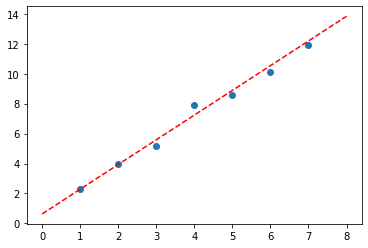

In [19]:
xx = np.linspace(0, 8)[:, np.newaxis]    #grid 생성, 기본 50개. 뒤[]는 1차원배열을 2차원배열로 확장
yy=reg.predict(xx)

plt.scatter(X_train + X_test, y_train+y_test)    # list라서 +로 합침
plt.plot(xx,yy, color="red", linestyle="--")


## @ statsmodels

In [20]:
import statsmodels.api as sm

X_train=[[1],[2],[3],[4],[5]]
y_train=[2.3, 3.99, 5.15, 7.89, 8.6]

X_train=sm.add_constant(X_train)    #상수항 추가
print(X_train)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [23]:
lr=sm.OLS(y_train, X_train)
reg=lr.fit()

In [24]:
X_test=[[6],[7]]
y_test=[10.1, 11.9]

X_test=sm.add_constant(X_test)
y_pred=reg.predict(X_test)

In [25]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     116.2
Date:                Thu, 16 Jul 2020   Prob (F-statistic):            0.00171
Time:                        10:13:00   Log-Likelihood:                -2.1891
No. Observations:                   5   AIC:                             8.378
Df Residuals:                       3   BIC:                             7.597
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6360      0.508      1.253      0.2

C:\Anaconda3\envs\py36\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


## 실습
보스턴 주택 가격

In [26]:
import sklearn.datasets as d

boston = d.load_boston()

In [27]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [28]:
type(boston)
# Dict랑 비슷한 데 똑같지는 않다

sklearn.utils.Bunch

In [30]:
import pandas as pd

df=pd.DataFrame(boston.data, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [32]:
X = pd.DataFrame(df["RM"])
y = boston.target

In [33]:
X

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [34]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

학습 7 : 검증 3
seed=1 로 고정

In [35]:
import sklearn.linear_model as lm
lr = lm.LinearRegression()

In [38]:
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = \
ms.train_test_split(X,y, test_size=0.3, random_state=1)

In [39]:
 reg = lm.LinearRegression().fit(X_train, y_train)

In [40]:
y_pred=reg.predict(X_test)

In [41]:
import sklearn.metrics as mt
print("MSE=", mt.mean_squared_error(y_test, y_pred))
print("R2=", mt.r2_score(y_test, y_pred))

MSE= 36.51721473083863
R2= 0.6015774471545621


In [42]:
reg.coef_

array([8.46109164])

In [43]:
reg.intercept_

-30.5710324108983

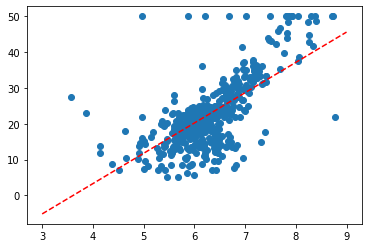

In [50]:
xx = np.linspace(3, 9)[:, np.newaxis]
yy=reg.predict(xx)

plt.scatter(X,y)
plt.plot(xx,yy, color="red", linestyle="--")

In [46]:
#pandas dataframe - describe
X.describe()

,RM
count,506.000000
mean,6.284634
std,0.702617
min,3.561000
25%,5.885500
50%,6.208500
75%,6.623500
max,8.780000
